# Protex

In [103]:
import pandas as pd

In [1]:
import requests
from bs4 import BeautifulSoup

In [61]:
from googletrans import Translator, constants
translator = Translator()

In [150]:
url = 'https://www.protex-soap.com.br/products'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'lxml')

In [9]:
prod_url = 'https://www.protex-soap.com.br' + soup.find('ul', class_ = 'articleList-list').find_all('li')[0].find('a').get('href')

In [10]:
prod_response = requests.get(prod_url)
prod_soup = BeautifulSoup(prod_response.content, 'lxml')

In [15]:
name = prod_soup.find('h1').text

In [14]:
img_url = 'https://www.protex-soap.com.br' + prod_soup.find('div', class_ = 'component-content middle').find('img').get('src')

In [59]:
desp_1 = prod_soup.find_all('div', class_ = 'richText component section default-style even col-xs-12')[0].text.strip().split('\n')[0]  

In [60]:
desp_2 = prod_soup.find_all('div', class_ = 'richText component section default-style even col-xs-12')[1].text.strip().split('\n')[:-1]

In [99]:
protex_products = list()
import re
regex = re.compile('.*articleList-article.*')

In [100]:
for i in range(len(soup.find('ul', class_ = 'articleList-list').find_all('li', class_ = regex))):
    dict_ = dict()
    prod_url = 'https://www.protex-soap.com.br' + soup.find('ul', class_ = 'articleList-list').find_all('li', class_ = regex)[i].find('a').get('href')
    dict_['url'] = prod_url 
    prod_response = requests.get(prod_url)
    prod_soup = BeautifulSoup(prod_response.content, 'lxml')
    name = prod_soup.find('h1').text
    dict_['name'] = name
    img_url = 'https://www.protex-soap.com.br' + prod_soup.find('div', class_ = 'component-content middle').find('img').get('src')
    dict_['imag_url'] = img_url
    desp_1 = prod_soup.find_all('div', class_ = 'richText component section default-style even col-xs-12')[0].text.strip().split('\n')[0]  
    desp_2 = ' '.join(prod_soup.find_all('div', class_ = 'richText component section default-style even col-xs-12')[1].text.strip().split('\n')[:-1])
    dict_['desp'] = desp_1 + ' ' + desp_2
    protex_products.append(dict_)

In [101]:
protex_products

[{'url': 'https://www.protex-soap.com.br/products/protex-vitamin-e-bar',
  'name': 'Protex® Vitamina E',
  'imag_url': 'https://www.protex-soap.com.br/content/dam/cp-sites/personal-care/protex-relaunch/global/img/products/protex-vitamina-e-85g.jpg',
  'desp': 'Protex Vitamina E, sabonete antibacteriano, sensação nutritiva. Oferece proteção antibacteriana natural com óleo de linhaça. Elimina 99,9% das bactérias* naturalmente, mantendo você protegido por até 12h**. O novo Protex Nutri Protect Vitamina E oferece proteção antibacteriana natural para uma pele saudável. Sua fórmula com óleo de linhaça penetra na pele e fortalece suas defesas naturais, protegendo você de dentro para fora. Elimina 99,9% das bactérias* naturalmente, mantendo você protegido por 12 horas**.\xa0 A combinação perfeita entre proteção e uma sensação nutritiva, com ingredientes conhecidos por seus benefícios nutricionais.\xa0'},
 {'url': 'https://www.protex-soap.com.br/products/protex-men-energy',
  'name': 'Protex® M

In [104]:
protex = pd.DataFrame(protex_products)

In [105]:
protex

,url,name,imag_url,desp
0,https://www.protex-soap.com.br/products/protex...,Protex® Vitamina E,https://www.protex-soap.com.br/content/dam/cp-...,"Protex Vitamina E, sabonete antibacteriano, se..."
1,https://www.protex-soap.com.br/products/protex...,Protex® Men Energy,https://www.protex-soap.com.br/content/dam/cp-...,"Protex® Energy. Desenvolvido para homens, ofer..."
2,https://www.protex-soap.com.br/products/protex...,Protex® Álcool Gel Antibacteriano* Para as mãos,https://www.protex-soap.com.br/content/dam/cp-...,Compre agora O novo Protex Álcool Gel Antibact...
3,https://www.protex-soap.com.br/products/protex...,Protex® Cuidado Íntimo Delicate Care,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Íntimo é um produto desenvolvido espec...
4,https://www.protex-soap.com.br/products/protex...,Protex® Cuidado Íntimo Soft Floral,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Íntimo é um produto desenvolvido espec...
5,https://www.protex-soap.com.br/products/protex...,Protex® Pro Hidrata Argan,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Pro Hidrata contém óleos hidratantes e...
6,https://www.protex-soap.com.br/products/protex...,Protex® Cuidado Íntimo Fresh Equilibrium,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Íntimo é um produto desenvolvido espec...
7,https://www.protex-soap.com.br/products/protex...,Protex® for Men 3 em 1,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Men 3 em 1. Proporciona 3 benefícios e...
8,https://www.protex-soap.com.br/products/protex...,Protex® for Men Sport,https://www.protex-soap.com.br/content/dam/cp-...,"Protex® Men Sport. Desenvolvido para homens, o..."
9,https://www.protex-soap.com.br/products/protex...,Protex® Pro Hidrata Oliva,https://www.protex-soap.com.br/content/dam/cp-...,Protex® Pro Hidrata contém óleos hidratantes e...


In [371]:
protex_logo = 'https://www.protex-soap.com.br/content/dam/cp-sites/personal-care/protex-relaunch/pt_br/img/sabonete-protex-logo.svg'

# Dove

In [123]:
prod_url = ['https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-ritualenergizante-matcha.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-revigorante-roma-e-verbena.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-original.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-esfoliacao-diaria.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-equilibrio-de-oleosidade-argila-agua-de-rosas.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-delicious-care-karite-e-baunilha.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-delicious-care-creme-e-flor-de-peonia.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-delicious-care-com-perfume-de-leite-de-coco.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-antistress-micelar.html',
            'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-antibacteriano-cuidaeprotege.html']

In [124]:
Dove_prod = list()

In [126]:
for url in prod_url:
    dict_ = dict()
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'lxml')
    dict_['url'] = url
    name = soup.find('h1',itemprop = 'name').text
    dict_['name'] = name
    img_url = soup.find('img',itemprop = 'image').get('src')
    dict_['img_url'] = img_url
    desp = soup.find('p',itemprop = 'description').text
    dict_['desp'] = desp
    Dove_prod.append(dict_)

In [127]:
Dove_prod

[{'url': 'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-ritualenergizante-matcha.html',
  'name': 'Sabonete Dove Ritual Energizante de Matchá',
  'img_url': 'https://www.dove.com/content/dam/unilever/dove/argentina/pack_shot/7891150064980-1624565-png.png.ulenscale.460x460.png',
  'desp': 'Reenergize sua rotina com o sabonete Dove Ritual Enerizante Matchá, que deixa sua pele limpa, hidratada e fresca. '},
 {'url': 'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-revigorante-roma-e-verbena.html',
  'name': 'Sabonete Dove Revigorante Romã & Verbena',
  'img_url': 'https://www.dove.com/content/dam/unilever/dove/brazil/pack_shot/7891150043923-2036774-png.png.ulenscale.460x460.png',
  'desp': 'O Sabonete Dove Go Fresh Revigorante Romã e Verbena promove um despertar suave para sua mente e pele.'},
 {'url': 'https://www.dove.com/br/banho-e-limpeza/sabonete-em-barra/sabonete-original.html',
  'name': 'Sabonete Original',
  'img_url': 'https://www.dove.com

In [128]:
Dove = pd.DataFrame(Dove_prod)

In [129]:
Dove

,url,name,img_url,desp
0,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Dove Ritual Energizante de Matchá,https://www.dove.com/content/dam/unilever/dove...,Reenergize sua rotina com o sabonete Dove Ritu...
1,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Dove Revigorante Romã & Verbena,https://www.dove.com/content/dam/unilever/dove...,O Sabonete Dove Go Fresh Revigorante Romã e Ve...
2,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Original,https://www.dove.com/content/dam/unilever/dove...,Essa fórmula de limpeza suave contém 1/4 de cr...
3,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Esfoliação Diária,https://www.dove.com/content/dam/unilever/dove...,O Sabonete Dove Esfoliação Diária limpa a pele...
4,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Dove Equilibrio de Oleosidade Argila ...,https://www.dove.com/content/dam/unilever/dove...,
5,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Delicious Care Karité e Baunilha,https://www.dove.com/content/dam/unilever/dove...,Desfrute de nossos agentes de limpeza e 1/4 de...
6,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Delicious Care Creme e Flor de Peônia,https://www.dove.com/content/dam/unilever/dove...,Obtenha uma pele radiante e bonita enquanto de...
7,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Delicious Care com Perfume de Leite D...,https://www.dove.com/content/dam/unilever/dove...,Deixe sua pele mais macia e hidratada com a de...
8,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Dove Antistress Micelar,https://www.dove.com/content/dam/unilever/dove...,
9,https://www.dove.com/br/banho-e-limpeza/sabone...,Sabonete Dove Antibacteriano Cuida e Protégé,https://www.dove.com/content/dam/unilever/dove...,"Dove agora elimina 99,9% das bactérias*! Cuide..."


In [153]:
dove_logo = soup.find('img', itemprop = 'logo').get('src')

# jnj

In [338]:
prod_url = ['https://www.jnjbrasil.com.br/johnsons/sabonete-desperte#bar-soap',
            'https://www.jnjbrasil.com.br/johnsons/sabonete-harmonize#bar-soap',
            'https://www.jnjbrasil.com.br/johnsons/sabonete-reviva#bar-soap',
            'https://www.jnjbrasil.com.br/johnsons/sabonete-suavize#bar-soap',
            'https://www.jnjbrasil.com.br/johnsons/sabonete-imagine#bar-soap',
            'https://www.jnjbrasil.com.br/neutrogena/rapid-clear-sabonete-facial-esfoliante-anticravos',
            'https://www.jnjbrasil.com.br/neutrogena/deep-clean-energizing-sabonete-facial',
            'https://www.jnjbrasil.com.br/neutrogena/deep-clean-sabonete-em-barra']

In [339]:
prod_name = ['JOHNSON’S ® DAILY CARE Fennel Soap',
             'JOHNSON’S ® DAILY CARE Roses and Sandalwood Soap',
             'JOHNSON’S ® NUTRISPA ™ Almond Rejuvenating Soap',
             'JOHNSON’S ® NUTRISPA ™ Renovating Pomegranate Soap',
             'JOHNSON’S ® DAILY CARE Lavender Soap',
             'NEUTROGENA ® Rapid Clear Anti-Blackhead Exfoliating Facial Soap',
             'DEEP CLEAN ® Energizing Facial Soap',
             'DEEP CLEAN ® Bar Soap']

In [340]:
img_url = ['https://www.jnjbrasil.com.br/sites/default/files/content-images/Sabonete/2_1.jpg',
           'Rose.png',
           'Almond.png',
           'Pomegranate.png',
           'https://www.jnjbrasil.com.br/sites/default/files/content-images/Sabonete/6.jpg',
           'https://www.jnjbrasil.com.br/sites/default/files/content-images/produto_neutrogena/neutrogena-sabonete-facial-esfoliante-johnson-e-johnson_0.jpg',
           'https://www.jnjbrasil.com.br/sites/default/files/content-images/produto_neutrogena/neutrogena-sabonete-facial-johnson-e-johnson.jpg',
           'https://www.jnjbrasil.com.br/sites/default/files/content-images/produto_neutrogena/neutrogena-limpeza-profunda-johnson-e-johnson.jpg']

In [341]:
desp = ['Gently removes impurities. JOHNSON´S ® soap has a moisturizing agent and natural ingredients that gently care for your skin. Its creamy foam and refreshing fragrance leave the skin clean and perfumed',
        'Gently removes impurities. JOHNSON´S ® soap  has a moisturizing agent that gently cares for your skin. Its creamy foam and refreshing fragrance leave your skin clean and fragrant.',
        'With moisturizing agents that stimulate the senses. JOHNSON´S ® soap has a moisturizing agent that gently cares for your skin. Its creamy foam and refreshing fragrance leave the skin clean and fragrant.',
        'With moisturizing agents that stimulate the senses. JOHNSON´S ® soap has a moisturizing agent and natural ingredients that gently care for your skin. Its creamy foam and refreshing fragrance leave the skin clean and fragrant.',
        'Gently removes impurities. JOHNSON´S ® soap has a moisturizing agent that gently cares for your skin. Its creamy foam and refreshing fragrance leave the skin clean and fragrant.',
        'With microspheres that remove oil and dead skin cells, preventing the formation of blackheads. NEUTROGENA ® Rapid Clear Anticraving Exfoliating Facial Soap contains microspheres that remove oil and dead skin cells, preventing the formation of blackheads. Your skin is soft and healthy.',
        'With revitalizing microspheres and a refreshing fragrance for your skin to stay energized. DEEP CLEAN ® Energizing Facial Soap removes impurities and oil from your skin. Its formula contains revitalizing microspheres and a refreshing fragrance, which leaves your skin energized.',
        'Deeply cleans pores eliminating oil and impurities from the skin. DEEP CLEAN ® Bar Soap deeply cleans the pores eliminating oil and impurities from the skin. It has glycerin formula with triclosan, an antibacterial that helps fight acne-causing bacteria. Your skin is cleaner, beautiful and healthy.']

In [342]:
jnj = pd.DataFrame(zip(prod_url, prod_name, img_url, desp), columns = ['prod_url', 'prod_name', 'img_url', 'desp'])

In [343]:
jnj

,prod_url,prod_name,img_url,desp
0,https://www.jnjbrasil.com.br/johnsons/sabonete...,JOHNSON’S ® DAILY CARE Fennel Soap,https://www.jnjbrasil.com.br/sites/default/fil...,Gently removes impurities. JOHNSON´S ® soap ha...
1,https://www.jnjbrasil.com.br/johnsons/sabonete...,JOHNSON’S ® DAILY CARE Roses and Sandalwood Soap,Rose.png,Gently removes impurities. JOHNSON´S ® soap h...
2,https://www.jnjbrasil.com.br/johnsons/sabonete...,JOHNSON’S ® NUTRISPA ™ Almond Rejuvenating Soap,Almond.png,With moisturizing agents that stimulate the se...
3,https://www.jnjbrasil.com.br/johnsons/sabonete...,JOHNSON’S ® NUTRISPA ™ Renovating Pomegranate ...,Pomegranate.png,With moisturizing agents that stimulate the se...
4,https://www.jnjbrasil.com.br/johnsons/sabonete...,JOHNSON’S ® DAILY CARE Lavender Soap,https://www.jnjbrasil.com.br/sites/default/fil...,Gently removes impurities. JOHNSON´S ® soap ha...
5,https://www.jnjbrasil.com.br/neutrogena/rapid-...,NEUTROGENA ® Rapid Clear Anti-Blackhead Exfoli...,https://www.jnjbrasil.com.br/sites/default/fil...,With microspheres that remove oil and dead ski...
6,https://www.jnjbrasil.com.br/neutrogena/deep-c...,DEEP CLEAN ® Energizing Facial Soap,https://www.jnjbrasil.com.br/sites/default/fil...,With revitalizing microspheres and a refreshin...
7,https://www.jnjbrasil.com.br/neutrogena/deep-c...,DEEP CLEAN ® Bar Soap,https://www.jnjbrasil.com.br/sites/default/fil...,Deeply cleans pores eliminating oil and impuri...


In [154]:
jnj_logo = 'https://www.jnjbrasil.com.br/sites/all/themes/jnjbrasil/logo.png'

# AVON

In [192]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import time

In [193]:
url = 'https://www.avon.com.br/search/?io_text=termos--sabonetes%20em%20barra'

In [216]:
driver = webdriver.Chrome('/Users/guopinjie/Downloads/chromedriver')

In [195]:
driver.get(url)

In [203]:
prod_name = []
prod_url = []
prod_img = []

In [204]:
for i in driver.find_elements_by_xpath("//div[contains(@class, 'offer-box opz-col-xs-6')]"):
    prod_url.append(i.find_elements_by_xpath(".//a")[0].get_attribute('href'))
    prod_name.append(i.find_elements_by_xpath(".//h4")[0].text)
    prod_img.append(i.find_elements_by_xpath(".//img")[0].get_attribute('src'))

In [205]:
len(prod_name)

73

In [ ]:
prod_desp = []
for url in prod_url:
    driver.get(url)
    time.sleep(3)
    desp = driver.find_elements_by_xpath("//div[@class = 'x-product__about-wrapper']")[0].text
    prod_desp.append(desp)

In [227]:
avon = pd.DataFrame(zip(prod_url, prod_name, prod_img, prod_desp), columns = ['prod_url', 'prod_name', 'img_url', 'desp'])

In [228]:
avon

,prod_url,prod_name,img_url,desp
0,https://www.avon.com.br/sabonete-de-limpeza-cl...,Sabonete de Limpeza Clearskin Extraforte com Á...,https://avongroup.vteximg.com.br/arquivos/ids/...,Sabonete em barra de limpeza extraforte que re...
1,https://www.avon.com.br/1192798-sabonete-em-ba...,Sabonete em Barra Clearskin,https://avongroup.vteximg.com.br/arquivos/ids/...,Sabonete de Limpeza Esfoliante. Realiza limpez...
2,https://www.avon.com.br/1267318-kit-3-sabonete...,Kit 3 Sabonetes em Barra Mickey e Minnie,https://avongroup.vteximg.com.br/arquivos/ids/...,Kit 3 Sabonetes em Barra Mickey e Minnie
3,https://www.avon.com.br/kit-3-sabonetes-em-bar...,Kit 3 sabonetes em barra Frozen Magic 50g,https://avongroup.vteximg.com.br/arquivos/ids/...,Transforme o momento do banho em uma verdadeir...
4,https://www.avon.com.br/1234167-kit-3-sabonete...,Kit 3 Sabonetes em Barra Frozen Magic - 50g cada,https://avongroup.vteximg.com.br/arquivos/ids/...,Transforme o momento do banho em uma verdadeir...
...,...,...,...,...
67,https://www.avon.com.br/kit-intensa-creme-e-sa...,Kit Intensa Creme e Sabonete,https://avongroup.vteximg.com.br/arquivos/ids/...,
68,https://www.avon.com.br/kit-bebe-calminho-sabo...,Kit Bebê Calminho Sabonete + Colônia,https://avongroup.vteximg.com.br/arquivos/ids/...,
69,https://www.avon.com.br/54835-simply-delicate-...,Simply Delicate Soft Lenços Umedecidos - 16 Le...,https://avongroup.vteximg.com.br/arquivos/ids/...,
70,https://www.avon.com.br/sabonete-cremoso-encan...,Sabonete Cremoso Encanto Delicadeza 4x 80g,https://avongroup.vteximg.com.br/arquivos/ids/...,


# Color Recognization

In [234]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

In [248]:
import urllib
from urllib.request import urlopen

In [262]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/85.0.4183.121 Safari/537.36'

In [267]:
# convert a url into an image
def url_to_image(url):
    headers={'User-Agent':user_agent,}
    request=urllib.request.Request(url,None,headers)
    response = urllib.request.urlopen(request)
    image = np.asarray(bytearray(response.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

The type of this input is <class 'numpy.ndarray'>
Shape: (1000, 1000, 3)


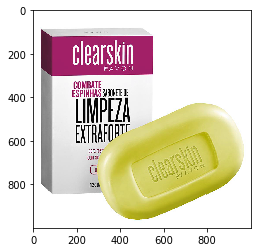

In [308]:
url = avon['img_url'][0]
image = url_to_image(url)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

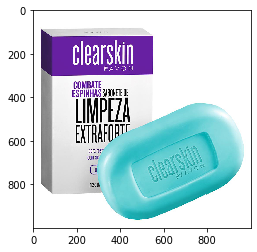

In [309]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [303]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [297]:
def get_image(image_path):
    if image_path.startswith('http'):
        image = url_to_image(image_path)
    else:
        image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [315]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    rgb_percent = [(ordered_colors[key],value) for key, value in counts.items()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_percent

[(array([247.12157851, 248.03845508, 248.38174307]), 148879),
 (array([ 94.71578003, 200.02674295, 204.36409336]), 59067),
 (array([111.50089853,  61.69162573, 153.50609001]), 25051),
 (array([25.54119663, 17.75938883, 34.02341853]), 7003)]

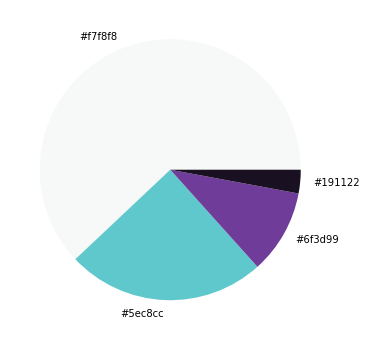

In [316]:
get_colors(get_image(url), 4, True)

## protex

In [344]:
protex_image = list(protex['imag_url'])
protex_colors = []
for i in protex_image:
    protex_colors.extend(get_colors(get_image(i), 4, False))

In [345]:
protex_colors

[(array([253.59324294, 253.47055527, 253.32247285]), 192727),
 (array([201.63930262, 159.47223184,  86.14213139]), 17275),
 (array([ 21.89891661,  70.97276613, 160.38852997]), 10059),
 (array([211.86849246, 192.12236181, 168.74276382]), 19939),
 (array([254.01995757, 254.1314498 , 254.00424798]), 189506),
 (array([59.93177183, 78.63994809, 89.03009703]), 16189),
 (array([124.00079804, 158.5650706 , 102.83437692]), 16317),
 (array([13.27597493, 25.12864037, 30.89859655]), 17988),
 (array([204.92208908, 215.74361697, 221.09697154]), 19768),
 (array([ 17.47561459,  69.45717684, 149.13838224]), 5043),
 (array([253.84887011, 253.9037525 , 254.07591623]), 207826),
 (array([134.36097164, 168.96390284, 188.96159587]), 7363),
 (array([254.80381127, 254.799312  , 254.80131739]), 194475),
 (array([193.76590397, 179.5049402 , 186.55295545]), 11553),
 (array([168.87871113,  83.67609399, 123.27986492]), 7111),
 (array([225.22861714, 222.58666617, 223.08248075]), 26861),
 (array([254.60261229, 254.59

([<matplotlib.patches.Wedge at 0x7f8be0114490>,
 [Text(0.9146165735327998, 0.6111272563215624, '#c0bcbf'),
  Text(0.3450499144387807, 1.0444809986523405, '#0d1922'),
  Text(-0.24101136417255664, 1.0732723430423816, '#c57d57'),
  Text(-1.088094160961259, 0.161403521900898, '#234087'),
  Text(-0.6333890105596298, -0.8993432944667421, '#729ba1'),
  Text(0.6767547496386896, -0.8671810703892668, '#fafafa')])

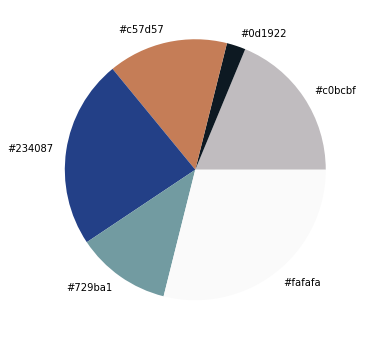

In [368]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(list(zip(*protex_colors))[0])
counts = Counter(labels)
counts = dict(sorted(counts.items()))
center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
rgb_percent = [(ordered_colors[key],value) for key, value in counts.items()]
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

[(array([160.29009037, 183.29300046, 161.46484913]), 6533),
 (array([  1.02653003,  42.8093861 , 143.93266903]), 31813),
 (array([254.47277584, 254.55624981, 254.69880005]), 193174),
 (array([ 29.06105611, 112.15924092, 191.25318246]), 8480)]

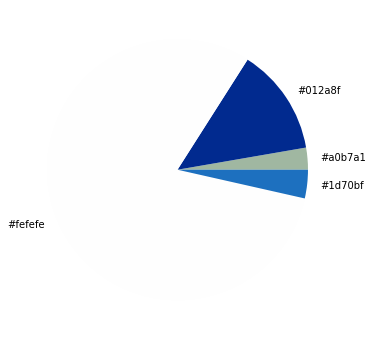

In [375]:
get_colors(get_image('protex_logo.png'), 4, True)

## Dove

In [395]:
dove_image = list(Dove['img_url'])
dove_colors = []
for i in dove_image:
    dove_colors.extend(get_colors(get_image(i), 4, False))

([<matplotlib.patches.Wedge at 0x7f8bc56af890>,
 [Text(0.7143928375004462, 0.8364465755372912, '#f2f2f1'),
  Text(-0.6465638275138399, 0.8899186574910392, '#215480'),
  Text(-0.9379041592647686, -0.5747484563127142, '#bcb4a7'),
  Text(0.420951775601599, -1.0162674857624154, '#000001'),
  Text(1.0162674857624152, -0.42095177560159946, '#9d755d')])

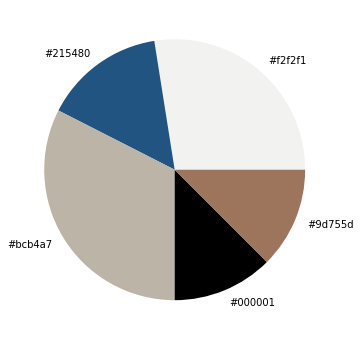

In [399]:
clf = KMeans(n_clusters = 5)
labels = clf.fit_predict(list(zip(*dove_colors))[0])
counts = Counter(labels)
counts = dict(sorted(counts.items()))
center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
rgb_percent = [(ordered_colors[key],value) for key, value in counts.items()]
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

[(array([254.84506562, 254.81823571, 254.77056256]), 222662),
 (array([27.82199357, 39.49080386, 64.02803859]), 7772),
 (array([222.7254902 , 199.71396396, 156.64692634]), 7548),
 (array([113.60049628, 119.9369727 , 134.53746898]), 2018)]

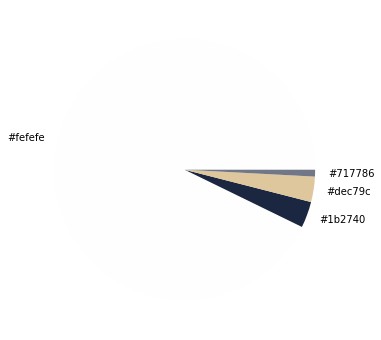

In [401]:
get_colors(get_image('dove_logo.png'), 4, True)

## jnj

In [402]:
jnj_image = list(jnj['img_url'])
jnj_colors = []
for i in jnj_image:
    jnj_colors.extend(get_colors(get_image(i), 4, False))

([<matplotlib.patches.Wedge at 0x7f8bc7356410>,
 [Text(0.9146165735327998, 0.6111272563215624, '#dd7a67'),
  Text(-0.5185364105085976, 0.9701133907831906, '#f8f8f7'),
  Text(-0.9701133907831906, -0.5185364105085974, '#383141'),
  Text(0.31931314497990837, -1.0526343693054299, '#c0bbbc'),
  Text(1.0162674857624152, -0.42095177560159946, '#746464'),
  Text(1.0947031993394167, -0.10781885436251658, '#0fb9db')])

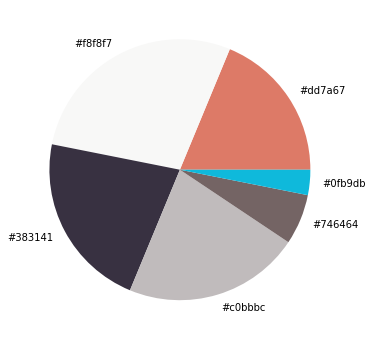

In [406]:
clf = KMeans(n_clusters = 6)
labels = clf.fit_predict(list(zip(*jnj_colors))[0])
counts = Counter(labels)
counts = dict(sorted(counts.items()))
center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
rgb_percent = [(ordered_colors[key],value) for key, value in counts.items()]
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

[(array([225.8120523 ,  15.41935326,  31.01474167]), 204668),
 (array([245.17917975, 156.83157294, 156.05918736]), 10493),
 (array([252.4794154 , 222.32681488, 221.88850007]), 14574),
 (array([234.67901355,  86.36718978,  88.19417097]), 10265)]

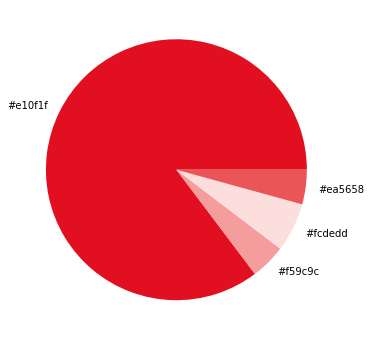

In [408]:
get_colors(get_image('jnj_logo.png'), 4, True)

## avon

In [409]:
avon_image = list(avon['img_url'])
avon_colors = []
for i in avon_image:
    avon_colors.extend(get_colors(get_image(i), 4, False))

([<matplotlib.patches.Wedge at 0x7f8bc9d43b50>,
 [Text(1.0593496534606701, 0.2962740483281628, '#b0a3a7'),
  Text(0.2614545037894502, 1.0684762713547795, '#fdfdfd'),
  Text(-0.8426488672029964, 0.7070663947618406, '#2c363b'),
  Text(-1.0889582852127033, 0.15546656575164014, '#bf564e'),
  Text(-1.0739256192870192, -0.23808352366132443, '#66adc2'),
  Text(-0.8726887004436892, -0.6696375378650044, '#6c667e'),
  Text(-0.08391238621675562, -1.0967947444437405, '#d4d2d4'),
  Text(0.621067623294139, -0.9078959231628754, '#1381a7'),
  Text(0.8726886769326917, -0.6696375685051341, '#ebc089'),
  Text(1.0684762774745635, -0.261454478779958, '#c5ab32')])

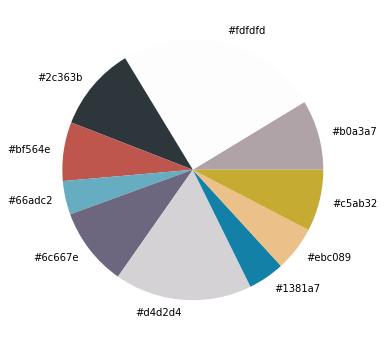

In [414]:
clf = KMeans(n_clusters = 10)
labels = clf.fit_predict(list(zip(*avon_colors))[0])
counts = Counter(labels)
counts = dict(sorted(counts.items()))
center_colors = clf.cluster_centers_
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
rgb_percent = [(ordered_colors[key],value) for key, value in counts.items()]
plt.figure(figsize = (8, 6))
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

[(array([254.676223, 254.676223, 254.676223]), 210855),
 (array([1.71488098, 1.71488098, 1.71488098]), 20879),
 (array([152.33746657, 152.33746657, 152.33746657]), 4113),
 (array([65.23525163, 65.23525163, 65.23525163]), 4153)]

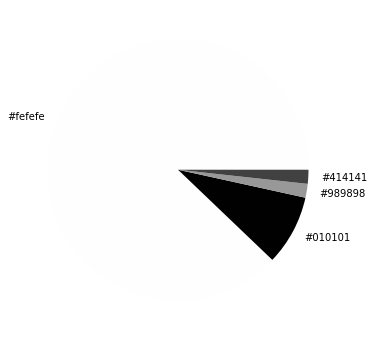

In [415]:
get_colors(get_image('avon_logo.png'), 4, True)

# Text Analysis

In [416]:
import nlpshortcut

## protex

In [420]:
protex_desp = [translator.translate(desp).text for desp in protex['desp']]

In [422]:
delete_words = ['protex']
protex_noun_chunk = nlpshortcut.chunk_generator(protex_desp, delete_words, bubbleplot = True)

In [423]:
protex_noun_chunk

[('natural antibacterial protection', 27),
 ('12 hours', 22),
 ('healthy skin', 19),
 ('linseed oil formula', 14),
 ('natural defenses', 14),
 ('flaxseed oil', 11),
 ('antibacterial soap', 10),
 ('intimate area', 9),
 ('natural barrier', 8),
 ("women's health", 6),
 ('moisturizing oils', 6),
 ('unique formula', 6),
 ('balanced ph', 6),
 ('protective barrier', 6),
 ('skin specialists', 6),
 ('excess oil', 6),
 ('normal oily skin', 5),
 ('deodorant action', 4),
 ('perfect combination', 4),
 ('® anti blackheads', 4),
 ('exclusive protex® system', 3),
 ('lactic acid', 3),
 ('intimate care', 3),
 ('natural way', 3),
 ('ph •', 3),
 ('pro hydrates', 3),
 ('vitamina e', 2),
 (', antibacterial soap', 2),
 ('nutri protect', 2),
 ('vitamin e', 2),
 ('nourishing sensation', 2),
 ('nutritional benefits', 2),
 ('® energy', 2),
 ('fresh equilibrium', 2),
 ('delicate protection', 2),
 ('prolonged feeling', 2),
 ('healthy ph', 2),
 ('3 benefits', 2),
 ('facial moisturizer', 2),
 ('gel formula', 2),
 ('

In [425]:
adj_delete = []
verb_delete = []
noun_delete = ['soap','skin']
protex_pos = nlpshortcut.pos_viz(protex_desp,delete_words, adj_delete, verb_delete, noun_delete, printcount = True, topcount = 10, noun_size = 0.6, verb_size = 0.9, adj_size = 0.2)


 noun 
 


[('bacteria', 61), ('protection', 53), ('formula', 25), ('hours', 22), ('eliminates', 19), ('linseed', 16), ('penetrates', 16), ('ingredients', 16), ('care', 15), ('defenses', 14)]

 verb 



[('offers', 29), ('keeping', 28), ('helps', 24), ('eliminates', 23), ('protected', 23), ('strengthens', 20), ('protecting', 18), ('developed', 17), ('pimples', 16), ('contains', 13)]

 adj_adv 



[('natural', 52), ('antibacterial', 46), ('naturally', 40), ('healthy', 36), ('intimate', 14), ('facial', 10), ('deeply', 10), ('exclusive', 9), ('specially', 6), ('balanced', 6)]


In [426]:
stopwords = list(set(delete_words + adj_delete + verb_delete + noun_delete))
LDA_analysis = nlpshortcut.ldacreator(' '.join(protex_desp),topics = 3,stopwords = stopwords, passes = 50)

In [427]:
LDA_analysis

[(0,
  '0.047*"bacteria" + 0.045*"natural" + 0.043*"protection" + 0.040*"antibacterial" + 0.037*"eliminates" + 0.026*"offers" + 0.024*"keeping" + 0.022*"healthy" + 0.021*"formula" + 0.021*"helps"'),
 (1,
  '0.006*"natural" + 0.006*"eliminates" + 0.006*"protection" + 0.006*"antibacterial" + 0.006*"offers" + 0.006*"bacteria" + 0.006*"keeping" + 0.006*"helps" + 0.006*"protected" + 0.006*"formula"'),
 (2,
  '0.006*"bacteria" + 0.006*"antibacterial" + 0.006*"natural" + 0.006*"protection" + 0.006*"eliminates" + 0.006*"offers" + 0.006*"helps" + 0.006*"keeping" + 0.006*"healthy" + 0.006*"hours"')]

## Dove

In [430]:
dove_desp = [translator.translate(desp).text for desp in Dove['desp']]

In [431]:
delete_words = ['dove']
dove_noun_chunk = nlpshortcut.chunk_generator(dove_desp, delete_words, bubbleplot = True)

In [432]:
dove_noun_chunk

[('ritual enerizante matchá soap', 1),
 ('fresh invigorating pomegranate', 1),
 ('verbena soap', 1),
 ('gentle awakening', 1),
 ('gentle cleansing formula', 1),
 ('1/4 moisturizing cream', 1),
 ('better-looking, smoother, healthier looking skin', 1),
 ('daily exfoliation soap', 1),
 ('dead cells', 1),
 ('best care', 1),
 ('smooth healthy appearance', 1),
 ('cleaning agents', 1),
 ('1/4 moisturizer', 1),
 ('relaxing aroma', 1),
 ('shea butter', 1),
 ('radiant beautiful skin', 1),
 ('delicious fragrant foam', 1),
 ('delicious care soap', 1),
 ('coconut milk scent jamim petals', 1),
 ('antibacterial protection', 1)]

In [433]:
adj_delete = []
verb_delete = []
noun_delete = ['soap','skin']
dove_pos = nlpshortcut.pos_viz(dove_desp,delete_words, adj_delete, verb_delete, noun_delete, printcount = True, topcount = 10, noun_size = 0.6, verb_size = 0.9, adj_size = 0.2)


 noun 
 


[('care', 4), ('invigorating', 1), ('pomegranate', 1), ('verbena', 1), ('awakening', 1), ('mind', 1), ('formula', 1), ('moisturizing', 1), ('cream', 1), ('healthier', 1)]

 verb 



[('take', 2), ('reenergize', 1), ('leaves', 1), ('promotes', 1), ('cleansing', 1), ('contains', 1), ('give', 1), ('betterlooking', 1), ('looking', 1), ('cleanses', 1)]

 adj_adv 



[('fresh', 2), ('gentle', 2), ('routine', 1), ('matchá', 1), ('clean', 1), ('hydrated', 1), ('smoother', 1), ('daily', 1), ('gently', 1), ('dead', 1)]


In [434]:
stopwords = list(set(delete_words + adj_delete + verb_delete + noun_delete))
LDA_analysis = nlpshortcut.ldacreator(' '.join(dove_desp),topics = 3,stopwords = stopwords, passes = 50)

In [435]:
LDA_analysis

[(0,
  '0.038*"care" + 0.026*"delicious" + 0.026*"gentle" + 0.026*"hydrated" + 0.026*"take" + 0.015*"aroma" + 0.015*"enerizante" + 0.015*"enjoying" + 0.015*"verbena" + 0.015*"moisturizer"'),
 (1,
  '0.016*"healthier" + 0.016*"promotes" + 0.016*"mind" + 0.016*"milk" + 0.016*"antibacterial" + 0.016*"foam" + 0.016*"combined" + 0.016*"scent" + 0.016*"petals" + 0.016*"fragrant"'),
 (2,
  '0.016*"pomegranate" + 0.016*"dead" + 0.016*"agents" + 0.016*"contains" + 0.016*"bacteria" + 0.016*"fresh" + 0.016*"matchá" + 0.016*"moment" + 0.016*"daily" + 0.016*"hydration"')]

## jnj

In [436]:
jnj_desp = [translator.translate(desp).text for desp in jnj['desp']]

In [440]:
delete_words = ['jnj','soap']
jnj_noun_chunk = nlpshortcut.chunk_generator(jnj_desp, delete_words, bubbleplot = True)

In [441]:
jnj_noun_chunk

[('refreshing fragrance', 7),
 ('moisturizing agent', 5),
 ('creamy foam', 5),
 ('natural ingredients', 2),
 ('moisturizing agents', 2),
 ('dead skin cells', 2),
 ('deep clean', 1),
 ('removes impurities', 1),
 ('glycerin formula', 1),
 ('acne-causing bacteria', 1)]

In [443]:
adj_delete = []
verb_delete = []
noun_delete = ['soap','skin']
jnj_pos = nlpshortcut.pos_viz(jnj_desp,delete_words, adj_delete, verb_delete, noun_delete, printcount = True, topcount = 10, noun_size = 0.6, verb_size = 0.9, adj_size = 0.2)


 noun 
 


[('fragrance', 7), ('impurities', 5), ('agent', 5), ('foam', 5), ('microspheres', 4), ('ingredients', 2), ('moisturizing', 2), ('agents', 2), ('cells', 2), ('formation', 2)]

 verb 



[('refreshing', 7), ('moisturizing', 5), ('leave', 5), ('removes', 3), ('cares', 3), ('skin', 3), ('care', 2), ('stimulate', 2), ('senses', 2), ('remove', 2)]

 adj_adv 



[('gently', 8), ('clean', 6), ('creamy', 5), ('fragrant', 3), ('natural', 2), ('dead', 2), ('facial', 2), ('healthy', 2), ('deep', 2), ('deeply', 2)]


In [444]:
stopwords = list(set(delete_words + adj_delete + verb_delete + noun_delete))
LDA_analysis = nlpshortcut.ldacreator(' '.join(jnj_desp),topics = 3,stopwords = stopwords, passes = 50)

In [445]:
LDA_analysis

[(0,
  '0.022*"leaves" + 0.022*"soft" + 0.022*"rapid" + 0.022*"antibacterial" + 0.022*"energizing" + 0.022*"perfumed" + 0.022*"fight" + 0.022*"exfoliating" + 0.022*"clear" + 0.022*"helps"'),
 (1,
  '0.062*"gently" + 0.054*"clean" + 0.054*"refreshing" + 0.054*"moisturizing" + 0.047*"fragrance" + 0.039*"creamy" + 0.039*"foam" + 0.039*"leave" + 0.039*"agent" + 0.032*"microspheres"'),
 (2,
  '0.022*"perfumed" + 0.022*"anticraving" + 0.022*"helps" + 0.022*"stay" + 0.022*"exfoliating" + 0.022*"energizing" + 0.022*"clear" + 0.022*"leaves" + 0.022*"beautiful" + 0.022*"glycerin"')]

## avon

In [446]:
avon_desp = [translator.translate(desp).text for desp in avon['desp']]

In [447]:
delete_words = ['avon','soap']
avon_noun_chunk = nlpshortcut.chunk_generator(avon_desp, delete_words, bubbleplot = True)

In [448]:
avon_noun_chunk

[('creamy foam', 9),
 ('olfactory notes', 6),
 ('real adventure', 4),
 ('refreshing fragrance', 4),
 ('excess oil', 3),
 ('© disney', 3),
 ('* 50g creamy', 3),
 ('vegetable oils', 3),
 ('skin surface', 2),
 ('oil-free formula', 2),
 ('3 soaps', 2),
 ('dangerous villains', 2),
 ('marvel avengers bar', 2),
 ('creamy foam cleans', 2),
 ('skin types', 2),
 ('jasmine flower recipe', 2),
 ('delicious experience', 2),
 ('delicious creamy foam', 2),
 ('clean, well-groomed skin', 2),
 ('care liquid hand', 2),
 ('extra strong cleansing bar', 1),
 ('excess oil eliminates impurities', 1),
 ('3 soaps bar mickey', 1),
 ('delicious fresh sweet floral fragrance', 1),
 ('fun memory game', 1),
 ('exfoliating bar', 1),
 ("kids' favorite characters", 1),
 ('new adventures', 1),
 ('fun puzzle', 1),
 ('toy story bar soaps', 1),
 ('3 bars', 1),
 ('minions gang', 1),
 ('minions bar', 1),
 ('banana scent', 1),
 ('bath time', 1),
 ('minions bar soaps', 1),
 ('3 units', 1),
 ('fun moment', 1),
 ('minnie mouse ba

In [450]:
adj_delete = []
verb_delete = []
noun_delete = ['soap','skin','foams','bath']
avon_pos = nlpshortcut.pos_viz(avon_desp,delete_words, adj_delete, verb_delete, noun_delete, printcount = True, topcount = 10, noun_size = 0.6, verb_size = 0.9, adj_size = 0.2)


 noun 
 


[('foam', 14), ('leaves', 11), ('soaps', 10), ('formula', 9), ('fragrance', 9), ('notes', 7), ('perfumes', 6), ('creamy', 6), ('care', 6), ('impurities', 5)]

 verb 



[('skin', 11), ('feeling', 8), ('contains', 8), ('provides', 6), ('refreshing', 6), ('based', 6), ('feel', 6), ('leaves', 5), ('turn', 5), ('cleaning', 4)]

 adj_adv 



[('soft', 13), ('creamy', 11), ('clean', 9), ('gently', 6), ('delicious', 6), ('smooth', 5), ('ready', 5), ('excess', 4), ('deeply', 4), ('real', 4)]


In [451]:
stopwords = list(set(delete_words + adj_delete + verb_delete + noun_delete))
LDA_analysis = nlpshortcut.ldacreator(' '.join(avon_desp),topics = 3,stopwords = stopwords, passes = 50)

In [452]:
LDA_analysis

[(0,
  '0.042*"creamy" + 0.030*"leaves" + 0.021*"foam" + 0.019*"soaps" + 0.015*"feeling" + 0.015*"soft" + 0.015*"turn" + 0.015*"fragrance" + 0.013*"contains" + 0.013*"perfumes"'),
 (1,
  '0.005*"merry" + 0.005*"floral" + 0.005*"flowers" + 0.005*"assist" + 0.005*"exotic" + 0.005*"extract" + 0.005*"ideal" + 0.005*"packing" + 0.005*"excessive" + 0.005*"combination"'),
 (2,
  '0.005*"creamy" + 0.005*"leaves" + 0.005*"soaps" + 0.005*"fragrance" + 0.005*"joins" + 0.005*"chamomile" + 0.005*"pixar" + 0.005*"completely" + 0.005*"foam" + 0.005*"facial"')]